In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [12]:
class Integrator:
    
    def __init__(self, x,y):
        
        self.x = x
        self.y = y
        self.h = self.x[1] - self.x[0]
        
        self.integral = 0.
        
    def Trapezoid(self):
        
        self.integral = 0.
        
        self.integral += 0.5*(self.y[0] + self.y[-1])
        
        self.integral += np.sum( self.y[1:-1] )
        
        return self.integral*self.h
    
    def GetTrapezoidError(self,f):
        
        d = (f( self.x + self.h ) - 2*f(self.x) + f( self.x - self.h))/self.h**2 
        
        
        max_ = np.max(np.abs(d))
        
        self.error = (max_* (self.x[-1]-self.x[0])**3 )/(12*(len(self.x)-1)**2)
        
        return self.error
    
    def Simpson(self):
        
        self.integral = 0.
        
        self.integral += self.y[0] + self.y[-1]
        
        for i in range( len(y[1:-1]) ):
            if i%2 == 0:
                self.integral += 4*y[i+1]
            else:
                self.integral += 2*y[i+1]
                
        return self.integral*self.h/3
    
    def GetSimpsonError(self,f):
        
        d = (f( self.x + 2*self.h ) - \
             4*f( self.x + self.h ) + \
             6*f(self.x) - \
             4*f( self.x - self.h ) + \
             f(self.x - 2*self.h))/self.h**4
        
        max_ = np.max( np.abs(d) )
        
        self.error = (self.x[-1] - self.x[0])*self.h**4 * max_ / 180.
        
        return self.error

In [13]:
sin = lambda x: np.sin(x)
N = 12
x = np.linspace(0,0.5*np.pi,N+1)
y = sin(x)

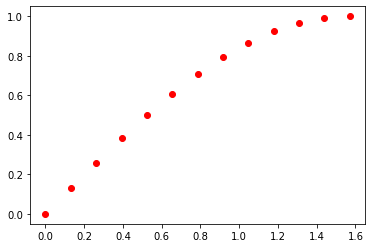

In [14]:
plt.scatter(x,y,color='r')

In [15]:
int1 = Integrator(x,y)
int1

In [16]:
int1.Trapezoid()

0.9985716979019743

In [17]:
int1.GetTrapezoidError(sin)

0.002239730054873284

$$ 0.998 \pm 0.002 $$

$$ 0.998(2) $$

In [18]:
integrate.trapezoid(y,x)

0.9985716979019744

In [19]:
int1.Simpson()

1.0000016344385794

In [22]:
int1.GetSimpsonError(sin)

2.5548268139593947e-06

In [20]:
integrate.simpson(y,x)

1.0000016344385798

$$ I = 1.000001 \pm 0.000003  $$ 

In [ ]:
]